In [1]:
import os
import tensorflow as tf
import pandas as pd
import keras
import numpy as np
#from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
samsung=pd.read_excel('samsung.xlsx',header = 0)  # 파일 읽기(yahoo데이터)
samsung.columns=['date','open','low','high','close','volume','adj.close'] #열 이름
ss_close=samsung['close']  #종가만 뽑기
type(ss_close)
ss_nparr=ss_close.values[::1] #종가를 np array로

Using TensorFlow backend.


In [4]:
samsung.columns=['date','open','low','high','close','volume','adj.close'] #열 이름

In [5]:
samsung

,date,open,low,high,close,volume,adj.close
0,2000-01-05,6060,5520,5800,5580,74680000,0.082740
1,2000-01-06,5780,5580,5750,5620,54390000,0.083333
2,2000-01-07,5670,5360,5560,5540,40305000,0.082147
3,2000-01-10,5770,5580,5600,5770,46880000,0.085558
4,2000-01-11,6100,5770,5820,5770,59745000,0.085558
...,...,...,...,...,...,...,...
5016,2019-12-24,55700,54800,55600,55000,11868463,55000.000000
5017,2019-12-26,55400,54400,54700,55400,9645034,55400.000000
5018,2019-12-27,56900,55500,55700,56500,12313056,56500.000000
5019,2019-12-30,56600,55700,56200,55800,8356767,55800.000000


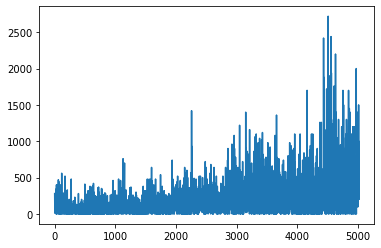

In [8]:
dailyGap=samsung['high']-samsung['low']
plt.plot(dailyGap)

In [17]:
samsung.columns=['date','open','high','low','close','volume','adj.close'] #열 이름

In [20]:
samsung

,date,open,high,low,close,volume,adj.close
0,2000-01-05,6060,5520,5800,5580,74680000,0.082740
1,2000-01-06,5780,5580,5750,5620,54390000,0.083333
2,2000-01-07,5670,5360,5560,5540,40305000,0.082147
3,2000-01-10,5770,5580,5600,5770,46880000,0.085558
4,2000-01-11,6100,5770,5820,5770,59745000,0.085558
...,...,...,...,...,...,...,...
5016,2019-12-24,55700,54800,55600,55000,11868463,55000.000000
5017,2019-12-26,55400,54400,54700,55400,9645034,55400.000000
5018,2019-12-27,56900,55500,55700,56500,12313056,56500.000000
5019,2019-12-30,56600,55700,56200,55800,8356767,55800.000000


In [10]:
ss_close=samsung['close']  #종가만 뽑기
type(ss_close)

pandas.core.series.Series

In [11]:
ss_nparr=ss_close.values[::1] #종가를 np array로
ss_nparr=ss_nparr.astype('float32')
print(ss_nparr)

[ 5580.  5620.  5540. ... 56500. 55800. 55200.]


In [12]:
look_back=1
def create_dataset(dataset,look_back=1):
    dataX, dataY=[], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i+look_back])
    return np.array(dataX),np.array(dataY)    #데이터셋으로 바꾸기

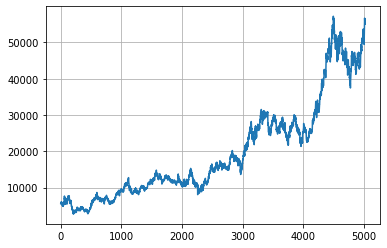

In [13]:
new_ssarr=ss_nparr.reshape(-1,1)
new_ssarr  # fit을 위한 reshape
plt.grid(True)
plt.plot(new_ssarr)

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
ss_trsf=scaler.fit_transform(new_ssarr)

In [15]:
train_size=int(len(ss_trsf)*0.9)
test_size=len(ss_trsf) - train_size   #train size, test size (90%사용)

In [ ]:
train, test=ss_trsf[0:train_size], ss_trsf[train_size:len(ss_trsf),:]
print([train,test])   #데이터의 train size, test size만큼 뽑아서 test,train만듬

In [ ]:
trainX , trainY= create_dataset(train, look_back)
testX, testY= create_dataset(test, look_back)
print(trainX)
print("#"*30)
print(trainY)

In [18]:
trainX=np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX=np.reshape(testX,(testX.shape[0],1,testX.shape[1]))
#[sample,feature]에서 [samples,time steps,features]로 바꿈

In [19]:
# LSTM만들기
model=Sequential()
model.add(LSTM(4,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=100,batch_size=1, verbose=2)

Epoch 1/100
 - 5s - loss: 0.0123
Epoch 2/100
 - 5s - loss: 7.2462e-05
Epoch 3/100
 - 5s - loss: 7.2470e-05
Epoch 4/100
 - 5s - loss: 7.1865e-05
Epoch 5/100
 - 5s - loss: 6.7762e-05
Epoch 6/100
 - 5s - loss: 6.6047e-05
Epoch 7/100
 - 5s - loss: 6.6504e-05
Epoch 8/100
 - 4s - loss: 6.5196e-05
Epoch 9/100
 - 4s - loss: 6.3220e-05
Epoch 10/100
 - 4s - loss: 6.3732e-05
Epoch 11/100
 - 4s - loss: 6.2345e-05
Epoch 12/100
 - 5s - loss: 5.9927e-05
Epoch 13/100
 - 5s - loss: 6.0039e-05
Epoch 14/100
 - 4s - loss: 6.0205e-05
Epoch 15/100
 - 4s - loss: 5.9104e-05
Epoch 16/100
 - 4s - loss: 5.7847e-05
Epoch 17/100
 - 5s - loss: 5.7325e-05
Epoch 18/100
 - 5s - loss: 5.6215e-05
Epoch 19/100
 - 4s - loss: 5.3930e-05
Epoch 20/100
 - 4s - loss: 5.4516e-05
Epoch 21/100
 - 4s - loss: 5.2822e-05
Epoch 22/100
 - 5s - loss: 5.0795e-05
Epoch 23/100
 - 4s - loss: 5.0788e-05
Epoch 24/100
 - 5s - loss: 5.2492e-05
Epoch 25/100
 - 4s - loss: 5.2224e-05
Epoch 26/100
 - 4s - loss: 5.1661e-05
Epoch 27/100
 - 4s - loss

In [20]:
# 예측하기
testPredict=model.predict(testX)
testPredict=scaler.inverse_transform(testPredict)
testY=scaler.inverse_transform(testY)
testScore=math.sqrt(mean_squared_error(testY,testPredict))
print('Train Score: %.2f RMSE' % testScore)

Train Score: 769.82 RMSE


In [21]:
# 다음날 주가 예측하기
lastX = new_ssarr[-1]
lastX = np.reshape(lastX, (1, 1, 1))
lastY = model.predict(lastX)
lastY = scaler.inverse_transform(lastY)
# 데이터 입력 마지막 다음날 종가 예측
print('마지막날 종가 예측: %d' % lastY)  

마지막날 종가 예측: 120771


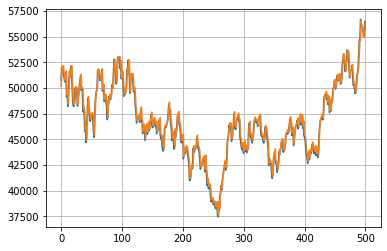

In [22]:
# 시각화~
plt.grid(True)
plt.plot(testY) #파란선
plt.plot(testPredict)
plt.show()

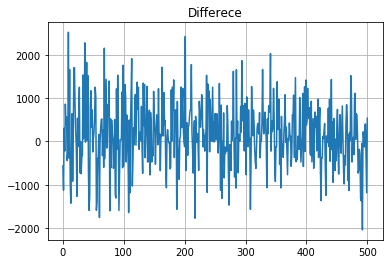

In [23]:
#예측의 차이값
plt.title("Differece")
plt.grid(True)
#plt.figure(figsize=(100,50))
plt.plot(testPredict-testY)

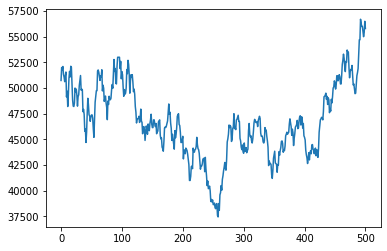

In [25]:
plt.plot(testY)

501


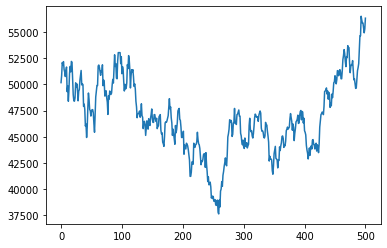

In [28]:
plt.plot(testPredict)
print(len(testPredict))

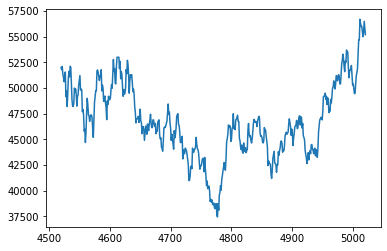

In [31]:
testrange=samsung[-501:]
plt.plot(testrange['close'])

In [37]:
testclose=np.array(samsung['close'][-501:])

In [ ]:
testPredict

In [45]:
testclose_rs=testclose.reshape(-1,1)

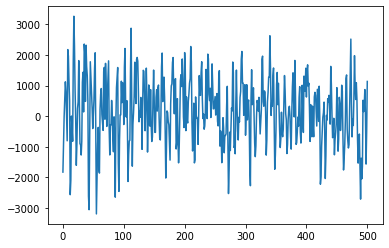

In [47]:
plt.plot(testPredict-testclose_rs)

In [66]:
difference=testPredict-testclose_rs

In [95]:
testopen=np.array(samsung['open'][-501:])

In [110]:
testhigh=np.array(samsung['high'][-501:])
testlow=np.array(samsung['low'][-501:])

In [ ]:
Predict1dim=testPredict.reshape(1,-1)
Predictarray=Predict1dim[0]
Predictarray

In [90]:
testopen_rs=testopen.reshape(-1,1)

In [124]:
expected_profitday=[]
for day in range(len(testopen)):
    if testopen[day]>Predictarray[day] and testhigh[day]>Predictarray[day]:
        expected_profitday.append(day)
    elif testopen[day]<Predictarray[day] and testlow[day]<Predictarray[day]:
        expected_profitday.append(day)
    else:
        pass

In [141]:
print("501일 동안 예상 수익 확률은 {}% 입니다".format(len(expected_profitday)/len(Predictarray)*100))

501일 동안 예상 수익 확률은 82.03592814371258% 입니다


In [125]:
expected_profitamount=[]
for day in range(len(testopen)):
    if testopen[day]>Predictarray[day] and testhigh[day]>Predictarray[day]:
        expected_profitamount.append(testopen[day]-Predictarray[day])
    elif testopen[day]<Predictarray[day] and testlow[day]<Predictarray[day]:
        expected_profitamount.append(Predictarray[day]-testopen[day])
    else:
        pass

In [142]:
print("501일 동안 예상 수익은 {} 원입니다".format(sum(expected_profitamount)))

501일 동안 예상 수익은 349445.78515625 원입니다
